In [1]:
#Importing required libraries
import numpy as np
import pickle
import cv2
import os
from os import listdir
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd
import numpy as np

In [2]:
#Dataset Directory
datasetDirectory = "C:/Users/akhil/OneDrive/Desktop/summer2022/tea sickness dataset/"

In [3]:
#List of Labels
os.listdir(datasetDirectory)

['algal leaf',
 'Anthracnose',
 'bird eye spot',
 'brown blight',
 'gray light',
 'healthy',
 'red leaf spot',
 'white spot']

In [4]:
#Resizing the Image
def image_array(path):
    image = cv2.imread(path)
    if image.any():
        return np.asarray(cv2.resize(image, (255, 255)))
    else:
        return np.array([])

In [5]:
#Appending images to image_list and labels to labels_list
image_list, label_list = [], []
for directory in listdir(datasetDirectory):
    print(f"Loading images from {directory}")
    for leafImage in listdir(f"{datasetDirectory}/{directory}/"):
        imagePath = f"{datasetDirectory}/{directory}/{leafImage}"
        if imagePath.endswith(".jpg") == True or imagePath.endswith(".JPG") == True:            
            image_list.append(image_array(imagePath))
            label_list.append(directory)

Loading images from algal leaf
Loading images from Anthracnose
Loading images from bird eye spot
Loading images from brown blight
Loading images from gray light
Loading images from healthy
Loading images from red leaf spot
Loading images from white spot


In [6]:
print("Total number of images processing :", len(image_list))

Total number of images processing : 885


In [7]:
#showing the sample images for each classified disease
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
    plt.figure(figsize=(10, 10))
    plt.suptitle(img_dir.split("/")[-1])
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx + 1)
        img = plt.imread(img_path)
        plt.tight_layout()
        plt.axis('off')
        plt.imshow(img, cmap='gray')

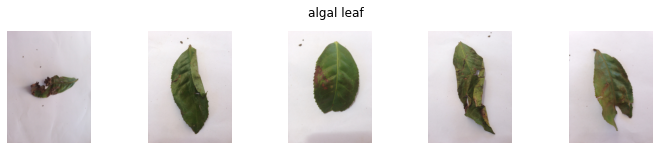

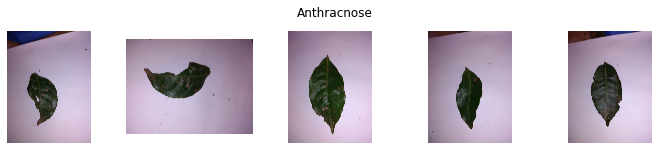

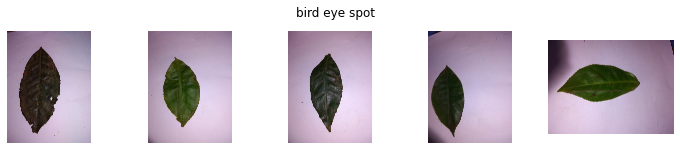

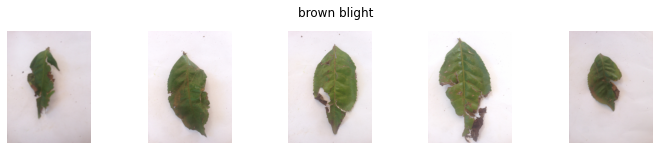

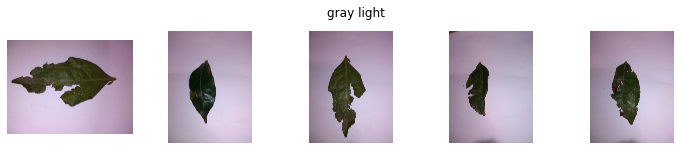

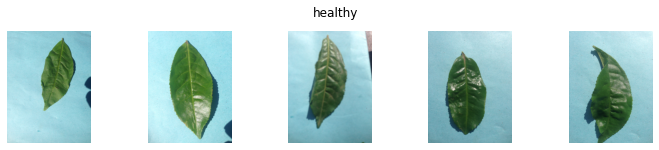

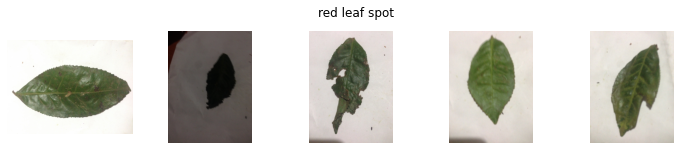

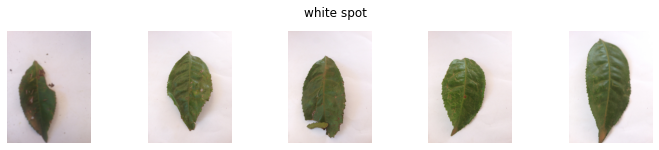

In [8]:
for dir in os.listdir(datasetDirectory):
    plot_images(datasetDirectory + "/" + dir)

In [9]:
#Plotting Bar Graph to show the count of images
def bar_chart(path_data):
    dic = {}
    for file in os.listdir(path_data):
        dem = 0
        for x in os.listdir(path_data + "/" + file):
            dem += 1
        dic[file] = dem
    print(dic)
    plt.figure(figsize=(8,5))
    barlist = plt.bar(list(range(len(dic))), list(dic.values()), tick_label=list(dic.keys()))
    plt.xticks(rotation=45)
    plt.show()

{'algal leaf': 113, 'Anthracnose': 100, 'bird eye spot': 100, 'brown blight': 113, 'gray light': 100, 'healthy': 74, 'red leaf spot': 143, 'white spot': 142}


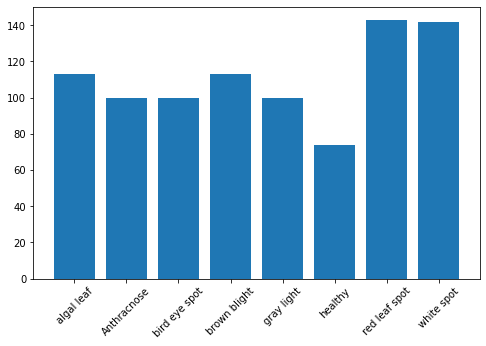

In [10]:
bar_chart(datasetDirectory)

In [11]:
#percentage of available data of each classification
def class_distribution(path_data):
    dic = {}
    for file in os.listdir(path_data):
        dem = 0
        for x in os.listdir(path_data + "/" + file):
            dem += 1
        dic[file] = dem
    for label, count in dic.items():
        percent = round((count / sum(list(dic.values()))) * 100, 2)
        print("{:<20s}:   {} or {}%".format(label, count, percent))

In [12]:
class_distribution(datasetDirectory)

algal leaf          :   113 or 12.77%
Anthracnose         :   100 or 11.3%
bird eye spot       :   100 or 11.3%
brown blight        :   113 or 12.77%
gray light          :   100 or 11.3%
healthy             :   74 or 8.36%
red leaf spot       :   143 or 16.16%
white spot          :   142 or 16.05%


In [13]:
#finding the mean of images for each disease 
def mean_image(full_mat, title, size = (255, 255)):
    mean_img = np.mean(full_mat, axis = 0).reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Mean Image Of {title}')
    plt.axis('off')
    plt.show()

In [14]:
temp = {}
for img, lab in zip(image_list, label_list):
    #print(img)
    img_ts = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).ravel()]            
    if lab not in temp:
        temp[lab] = img_ts
    else:
        temp[lab] = np.concatenate(( temp[lab], img_ts))

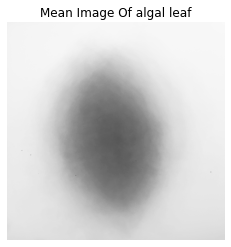

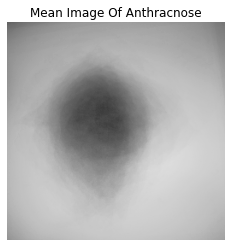

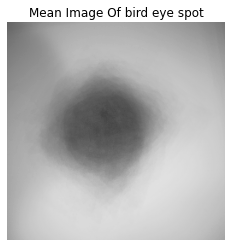

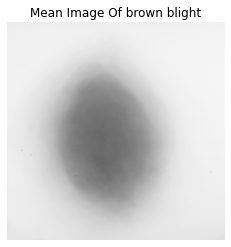

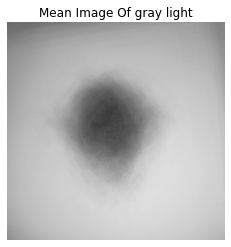

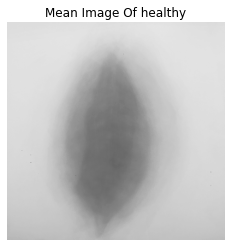

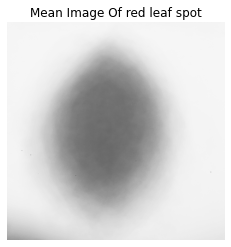

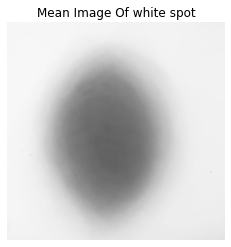

In [15]:
for title, fullMat in temp.items():
    mean_image(fullMat, title)

In [16]:
temp.keys()

dict_keys(['algal leaf', 'Anthracnose', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot'])

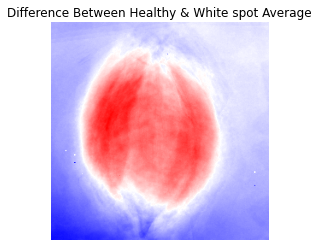

In [17]:
size = (255, 255)

Healthy_mean_img = np.mean(temp['healthy'], axis = 0)
Healthy_mean_img = Healthy_mean_img.reshape(size)

White_mean_img = np.mean(temp['white spot'], axis = 0)
White_mean_img = White_mean_img.reshape(size)
    
contrast_mean = Healthy_mean_img - White_mean_img
plt.imshow(contrast_mean, cmap='bwr')
plt.title(f'Difference Between Healthy & White spot Average')
plt.axis('off')
plt.show()

In [18]:
for i, img in enumerate(image_list):
    img_ts = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    image_list[i] = img_ts

In [19]:
# normalising images
image_list = np.array(image_list, dtype=np.float16) / 255.0

In [20]:
# encoding labels
encoder = LabelEncoder()
image_labels = encoder.fit_transform(label_list)
pickle.dump(encoder, open('label_transform.pkl', 'wb'))
n_classes = len(encoder.classes_)

In [21]:
# segregating images and labels into train and test
x_train, x_test, y_train, y_test = train_test_split(image_list,
                                                    image_labels,
                                                    test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  test_size=0.2,
                                                  random_state=1)